In [1]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
SEED=123
FILE_NAME = "dataset_week_1.csv"

In [3]:
data = pd.read_csv(FILE_NAME)

In [4]:
data.shape

(10008, 785)

In [5]:
# The labels for images.
y = data["label"]

In [6]:
# Drop 'label' column.
X = data.drop(columns= ["label"])

In [7]:
# Normalize the data
X = X.astype('float32') / 255.0

In [8]:
X = X.values # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

In [9]:
# Split data into test and train to build the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=SEED)


Text(0.5, 1.0, '0')

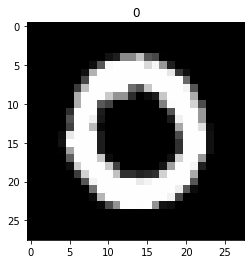

In [10]:
i=1
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

In [11]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=SEED,
                            max_depth=5)
clf.fit(X_train, y_train)

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [12]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8236077804423129, 0.8081534772182254)

Text(0.5, 1.0, '1')

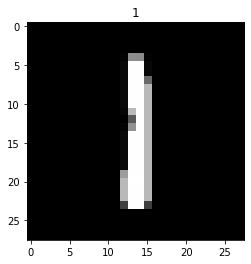

In [26]:
i=2
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

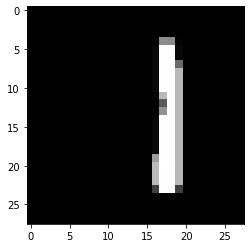

In [27]:
img1 = np.zeros((28,28))
img1[:,4:] = img[:,0:24]
plt.imshow(img1, cmap='gray')

In [28]:
clf.predict_proba(X[i].reshape(1, -1)).round(2)

array([[0.  , 0.78, 0.06, 0.02, 0.01, 0.02, 0.01, 0.04, 0.04, 0.02]])

In [29]:
clf.predict_proba(img1.flatten().reshape(1,-1)).round(2)

array([[0.04, 0.05, 0.17, 0.1 , 0.04, 0.06, 0.05, 0.39, 0.04, 0.05]])

In [17]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [31]:

import tensorflow as tf
import tensorflow.keras.layers as L


In [32]:
tf.random.set_seed(
    123
)
np.random.seed(123)
tf.compat.v1.set_random_seed(123)

In [35]:
X.shape

(10008, 784)

In [38]:
X = X.reshape(10008,28,28,1)

In [39]:

model1 = tf.keras.models.Sequential()
model1.add(L.Conv2D(3, (3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model1.add(L.MaxPooling2D((2, 2)))
model1.add(L.Flatten())
model1.add(L.Dense(10, activation="softmax"))
#model.add(L.Dense(256, activation="relu"))
model1.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])
model1.fit(X, y, epochs=5, validation_split=0.3)


Train on 7005 samples, validate on 3003 samples
Epoch 1/5
7005/7005 [==============================] - 1s 186us/sample - loss: 1.1461 - accuracy: 0.7036 - val_loss: 0.4913 - val_accuracy: 0.8625
Epoch 2/5
7005/7005 [==============================] - 1s 120us/sample - loss: 0.3823 - accuracy: 0.8885 - val_loss: 0.3531 - val_accuracy: 0.9011
Epoch 3/5
7005/7005 [==============================] - 1s 118us/sample - loss: 0.2985 - accuracy: 0.9129 - val_loss: 0.2999 - val_accuracy: 0.9161
Epoch 4/5
7005/7005 [==============================] - 1s 120us/sample - loss: 0.2541 - accuracy: 0.9248 - val_loss: 0.2737 - val_accuracy: 0.9221
Epoch 5/5
7005/7005 [==============================] - 1s 120us/sample - loss: 0.2259 - accuracy: 0.9336 - val_loss: 0.2532 - val_accuracy: 0.9271


In [86]:
model3 = tf.keras.models.Sequential()

model3.add(L.Conv2D(3, (3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model3.add(L.MaxPooling2D((2, 2)))

model3.add(L.Conv2D(6, (3, 3), padding='same', activation="relu"))
model3.add(L.MaxPooling2D((2, 2)))

model3.add(L.Conv2D(9, (3, 3), padding='same', activation="relu"))
model3.add(L.MaxPooling2D((2, 2)))

model3.add(L.Flatten())
model3.add(L.Dense(10, activation="softmax"))
#model.add(L.Dense(256, activation="relu"))
model3.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])
model3.fit(X, y, epochs=6, validation_split=0.3)

Train on 7005 samples, validate on 3003 samples
Epoch 1/6
7005/7005 [==============================] - 2s 237us/sample - loss: 1.7794 - accuracy: 0.3830 - val_loss: 0.7293 - val_accuracy: 0.7835
Epoch 2/6
7005/7005 [==============================] - 1s 210us/sample - loss: 0.4886 - accuracy: 0.8471 - val_loss: 0.4042 - val_accuracy: 0.8728
Epoch 3/6
7005/7005 [==============================] - 1s 213us/sample - loss: 0.3211 - accuracy: 0.8986 - val_loss: 0.3116 - val_accuracy: 0.9014
Epoch 4/6
7005/7005 [==============================] - 1s 197us/sample - loss: 0.2625 - accuracy: 0.9195 - val_loss: 0.2683 - val_accuracy: 0.9151
Epoch 5/6
7005/7005 [==============================] - 2s 214us/sample - loss: 0.2232 - accuracy: 0.9293 - val_loss: 0.2437 - val_accuracy: 0.9251
Epoch 6/6
7005/7005 [==============================] - 1s 195us/sample - loss: 0.2006 - accuracy: 0.9385 - val_loss: 0.2284 - val_accuracy: 0.9294


In [57]:
model3.fit(X, y, epochs=3, validation_split=0.3)

Train on 7005 samples, validate on 3003 samples
Epoch 1/3
7005/7005 [==============================] - 1s 154us/sample - loss: 0.2358 - accuracy: 0.9305 - val_loss: 0.2444 - val_accuracy: 0.9284
Epoch 2/3
7005/7005 [==============================] - 1s 165us/sample - loss: 0.1998 - accuracy: 0.9405 - val_loss: 0.2125 - val_accuracy: 0.9371
Epoch 3/3
7005/7005 [==============================] - 1s 164us/sample - loss: 0.1743 - accuracy: 0.9486 - val_loss: 0.2028 - val_accuracy: 0.9387


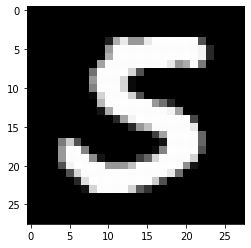

In [89]:
img = X[99] #99
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')

In [91]:
num=5
for shift in range(0,10):
    img1 = np.zeros((28,28))
    img1[:,shift:] = img[:,0:28-shift]
    print(shift, end="\t")
    
    print(clf.predict_proba(img1.flatten().reshape(1,-1))[0][num], end="\t")
    print(model1.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
    print(model3.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
    
    print("\n")

0	0.4527477093544607	0.992462	0.9997905	

1	0.3397970788696516	0.9987262	0.99997604	

2	0.2979385588097152	0.9980014	0.99989617	

3	0.26663057167131293	0.9911033	0.9998927	

4	0.21519422009559075	0.95949954	0.9997509	

5	0.05327538423479457	0.7497303	0.99261075	

6	0.05653664125228151	0.26924628	0.8957263	

7	0.04966382189466104	0.05969131	0.651138	

8	0.04501829625477236	0.016372958	0.5690864	

9	0.04501829625477236	0.014721029	0.07961608	



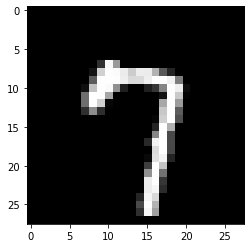

In [76]:
img = X_test[888]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')

0.1577233667001932	0.0014370191	3.5090095e-06	

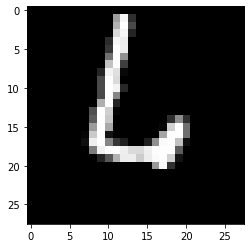

In [77]:
num=7
img1 = np.rot90(img,2)
plt.imshow(img1, cmap='gray')
print(clf.predict_proba(img1.flatten().reshape(1,-1))[0][num], end="\t")
print(model1.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
print(model3.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
